A **multi-layer perceptron (MLP)** is a type of artificial neural network consisting of multiple layers of neurons. The neurons in the MLP typically use nonlinear activation functions, allowing the network to learn complex patterns in data.

# **Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

# **Load Dataset**

In [ ]:
dataset=pd.read_csv('/content/tip.csv')

# **Data Preprocessing**

In [ ]:
#missing values
missing_values=dataset.isnull().sum()
missing_values

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:
#Check duplicate values
duplicate_values=dataset.duplicated().sum()
int(duplicate_values)

1

  Observation : 1 duplicate value in dataset

In [ ]:
#remove duplicate value
dataset.drop_duplicates(inplace=True)

#again check duplication
duplicate_value=dataset.duplicated().sum()
int(duplicate_value)

0

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  243 non-null    float64
 1   tip         243 non-null    float64
 2   sex         243 non-null    object 
 3   smoker      243 non-null    object 
 4   day         243 non-null    object 
 5   time        243 non-null    object 
 6   size        243 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [ ]:
categorical_column=dataset.select_dtypes(include=['object']).columns
categorical_column

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [ ]:
# Categorical to numerical
dataset=pd.get_dummies(dataset,columns=categorical_column,drop_first=True)

# **Featuer Selection**

In [ ]:
x=dataset.drop('tip',axis=1)
y=dataset['tip']

# **Spliting Data**

In [ ]:
# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **Standard Scaling**

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# **Model & Layers**

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,activation='relu',input_shape=(X_train.shape[1],)), # input layers
    tf.keras.layers.Dense(64,activation='relu'),# hidden layer
    tf.keras.layers.Dense(32,activation='relu'), # hidden layer
    tf.keras.layers.Dense(1) # output layers
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

# **Compile Model**

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

# **CallBack Function**
Callback functions provide a way to customize and control the training process of a machine learning model without altering the core training loop.

In [ ]:
early_stoping=EarlyStopping(patience=5)

# **Train Model**

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stoping])

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 11.3094 - val_loss: 8.5079
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 8.2765 - val_loss: 5.6584
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4.6009 - val_loss: 3.0356
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 2.6763 - val_loss: 1.7858
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 1.3567 - val_loss: 2.1088
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 1.4263 - val_loss: 1.9968
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 1.2479 - val_loss: 1.4885
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 1.0842 - val_loss: 1.3504
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.9682 - val_loss: 1.3093
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.9870 - val_loss: 1.3031
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.9865 - val_loss: 1.2812
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.1395 - va

# **Evaluate Model**

In [ ]:
loss = model.evaluate(X_test, y_test, verbose=0)
loss

1.1307631731033325

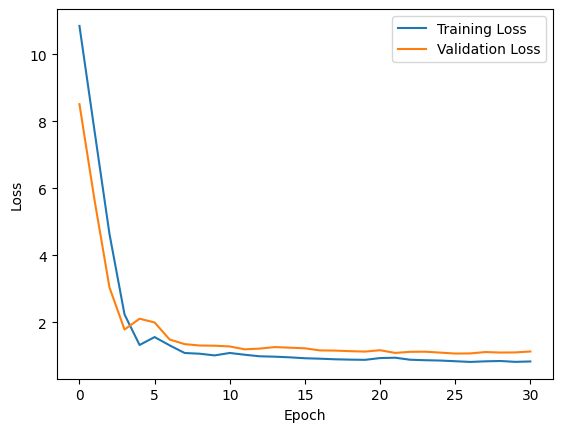

In [ ]:
# plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()